In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('../Data_Cleaning/Data/gurgaon_properties_v2.csv')

In [236]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [237]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,2.20,6934.0,3173.0,Super Built up area 2812(261.24 sq.m.),4.0,5.0,3+,...,2812.0,NaN,NaN,0,0,0,0,0,1,106
1,flat,m3m sierra 68,sector 68,1.08,8674.0,1245.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2.0,2.0,3,...,1245.0,1130.0,930.0,0,0,0,0,0,0,149
2,flat,ashiana anmol,sohna road,0.99,8215.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,...,1205.0,NaN,900.0,0,0,0,0,0,1,49
3,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10.0,10.0,3+,...,NaN,347.0,215.0,0,0,0,0,0,1,0
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4.0,5.0,3+,...,2950.0,2650.0,2450.0,0,1,0,0,0,0,158


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   float64
 8   bathroom             3803 non-null   float64
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [ ]:
df.duplicated().sum()

123

In [240]:
df.drop_duplicates(inplace=True)

# Property_type

<Axes: >

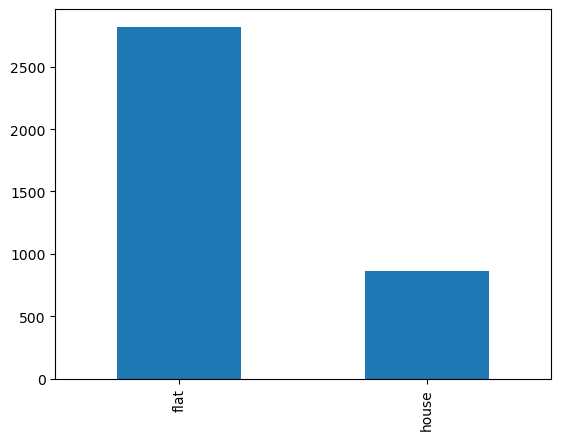

In [241]:
df['property_type'].value_counts().plot(kind='bar')

In [242]:
df['property_type'].value_counts()

flat     2821
house     859
Name: property_type, dtype: int64

<b> Observations
- Flats are in majority. 77% Flats | 23% house
- No missing values

# Society

In [243]:
df['society'].value_counts()

independent                             486
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
spire woods now ananda by alpha corp      1
malibu towers                             1
surya vihar rwa                           1
dlf city plots phase 4                    1
awho sispal vihar                         1
Name: society, Length: 676, dtype: int64

In [244]:
# Number of unique values
df['society'].nunique()

676

In [245]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023489
ss the leaf                             0.046351
dlf new town heights                    0.059505
shapoorji pallonji joyville gurugram    0.072659
signature global park                   0.083620
                                          ...   
ansal heights 86                        0.489821
umang monsoon breeze                    0.493893
indiabulls enigma                       0.497964
mvn athens                              0.501723
ireo the corridors                      0.505481
Name: society, Length: 75, dtype: float64

In [246]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >=50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts <50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 275,
 'Very Low (1)': 306}

<Axes: >

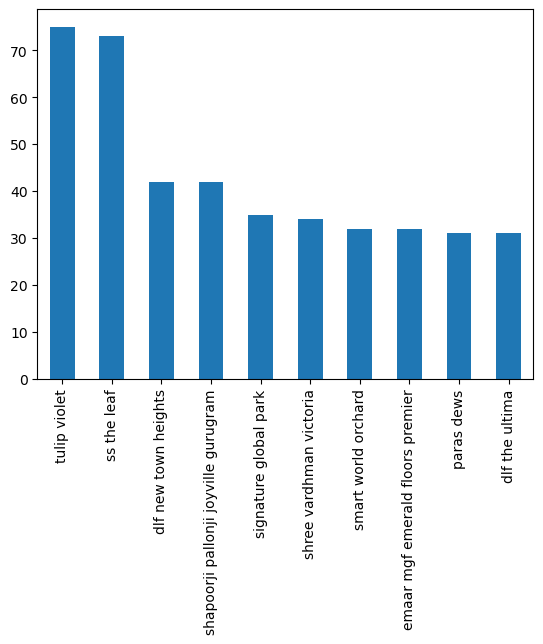

In [247]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [248]:
df['society'].isnull().sum()

1

In [249]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1402,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,0,...,NaN,1625.0,NaN,0,0,0,0,0,1,0


<b> Observations

- Around 13% of the properties are independent properties | Without any society
- There are 675 societies
- The top 75 societies have 50% of the properties and the rest 50% of the properties are in the remaining data
- Very High (>100): Only 1 society has more than 100 listings.
- High (50-100): 2 societies have between 50 to 100 listings.
- Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
- Low (2-9): 273 societies have between 2 to 9 listings.
- Very Low (1): A significant number, 308 societies, have only 1 listing.

- 1 missing value

# Sector

In [250]:
df.sector.value_counts()

sohna road    154
sector 85     108
sector 102    107
sector 92      99
sector 69      93
             ... 
sector 27       3
sector 17b      3
sector 73       3
sector 88b      3
sector 37       1
Name: sector, Length: 115, dtype: int64

In [251]:
df.sector.value_counts().shape

(115,)

In [252]:
df['sector'].nunique()

115

<Axes: >

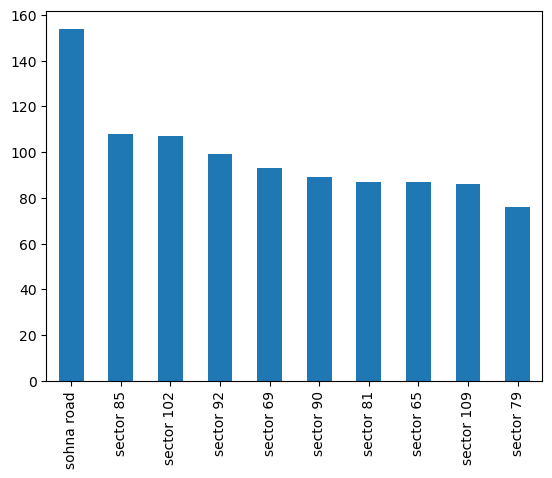

In [253]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [254]:
# Frequency distribution table
sector_counts = df['sector'].value_counts()

sectors_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sectors_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

<b> Observations

- There are a total of 104 unique sectors in the dataset
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings
    - High (50-100): 25 sectors have between 50 to 100 listings
    - Average (10-49): A majority 60  sectors fall in this range with 10 to 49 listings each
    - Low (2-9): 16 sectors have between 2 to 9 listings
    - Very Low (1): Interstingly, there are no sectors with only 1 listing

# Price

In [255]:
df['price'].isnull().sum()

17

In [256]:
df['price'].describe() # There are outliers inflating the price

count    3663.000000
mean        2.532520
std         2.979723
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

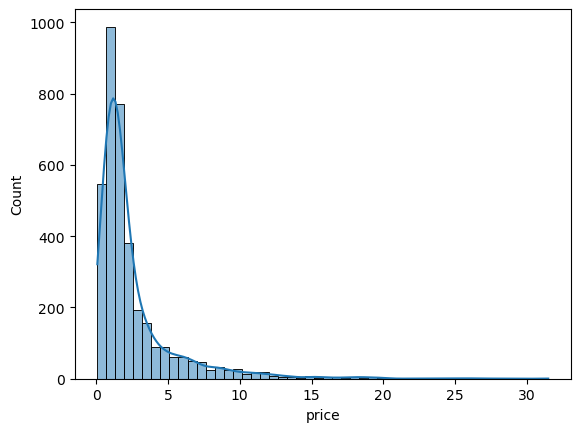

In [257]:
sns.histplot(df['price'], kde=True, bins=50)

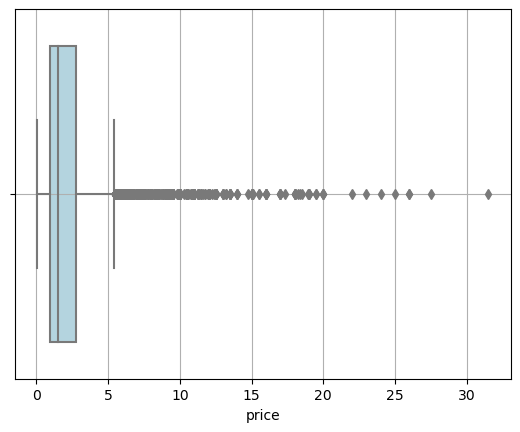

In [258]:
sns.boxplot(x=df['price'], color='lightblue')
plt.grid()

<b> Descriptive Stats </b>
- Count: There are 3660 non-missing price entries
- Mean Price: The average price is approx. 2.53 crores
- Median Price: The median price is 1.52 crores
- Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices
- Range: Prices range from a min of 0.07 crores to a max of 31.5 crores
- IQR: The IQR range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores
    
<b> Visualizations: </b>
- Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

<b> Missing Values: </b>
- There are 17 missing values in the column

In [259]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(skewness, kurtosis)

3.2804741762100056 14.945466634736098


<b> SKewness: 
- The price distribution has a skewness of approx. 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.
    
<b> Kurtosis: 
- The kurtosis value is approx. 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a  normal distribution

In [260]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.252
Name: price, dtype: float64

<b> Quantile Analysis
- 1% Qunatile: Only 1% of properties are priced below 0.25 crores
- 5% Quantile: 5% of properties are prices below 0.37 crores
- 95% Quantile: 95% of properties are priced below 8.5 crores
- 99% Quantile: 99% of properties are priced below 15.25 crores | Only very few are priced above 15.25 crore

In [261]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

IQR = Q3 - Q1
IQR

1.8

In [262]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [263]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [264]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<b> Outliers Analysis (using IQR method):
- Based on the IQR method, there are 425 properties considered as outliers
- These outliers have anaverage price of approx. 9.24 crores
- The range for these outliers is from 5.35 crores to 31.5 crores

<Axes: >

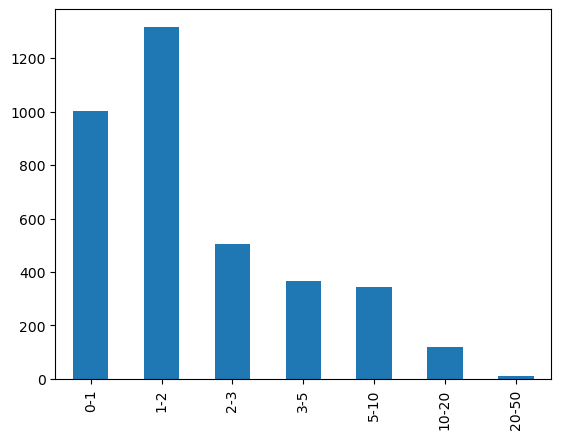

In [265]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- Majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges
- There's a significant drop in the number of properties priced above "5 crores"

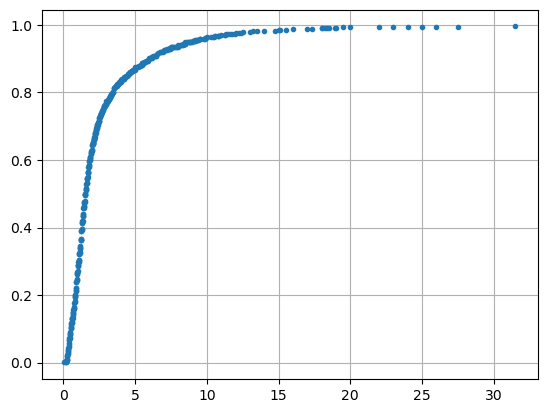

In [266]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

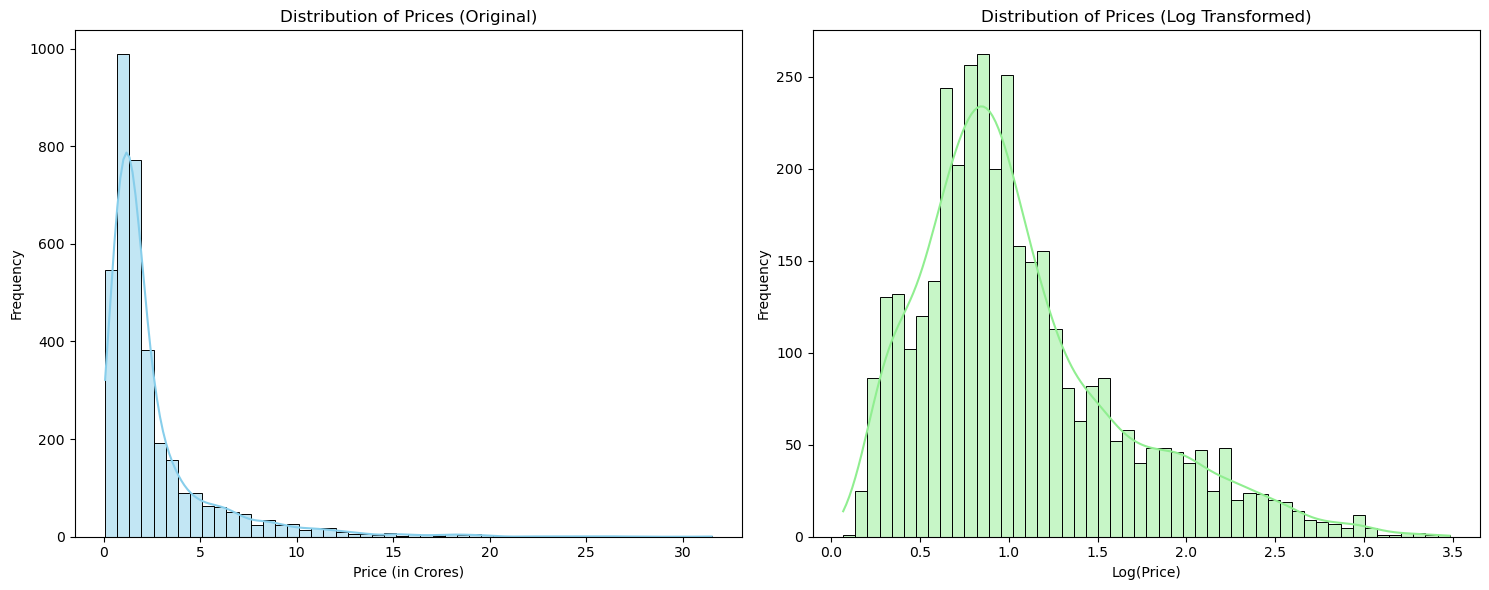

In [267]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with Log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.
- Using np.log1p helps in transforming the price column while ensuring that any value(including zero, if presend) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [268]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

1.0745712196284083 0.9666634701913348


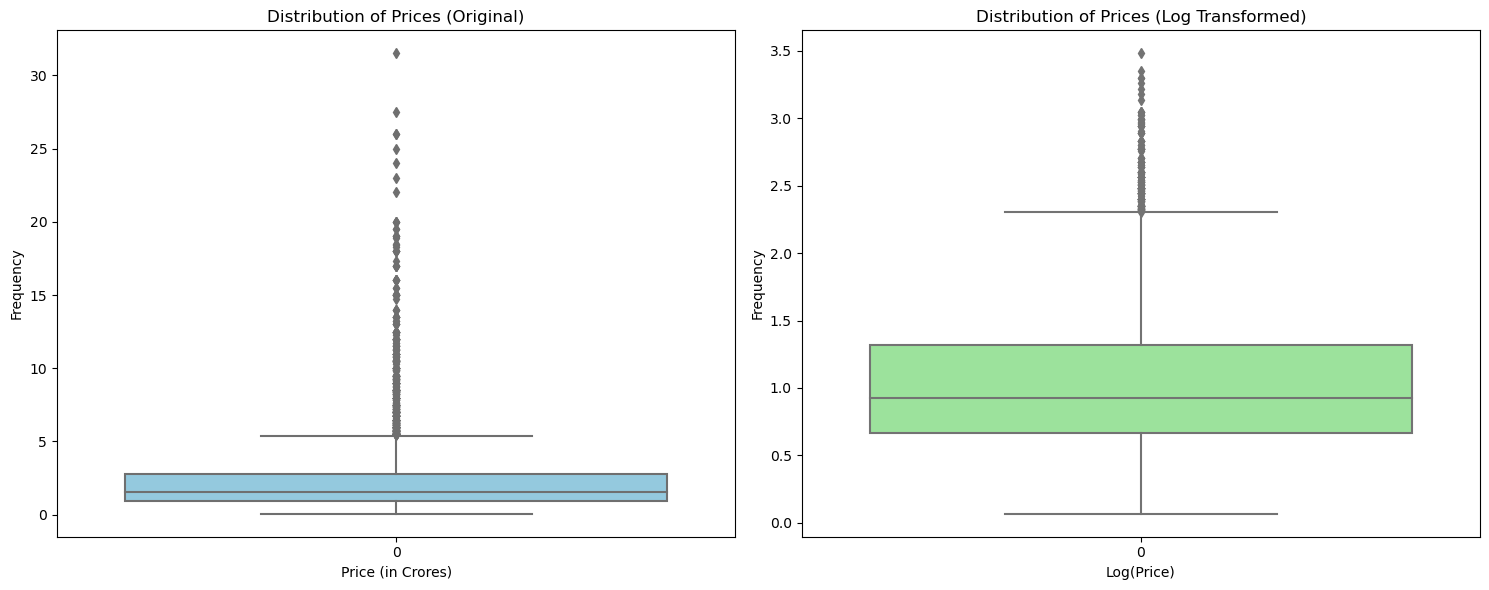

In [269]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# price_per_sqft

In [270]:
df['price_per_sqft'].isnull().sum()

17

In [271]:
df['price_per_sqft'].describe()

count      3663.000000
mean      13890.319410
std       23201.147379
min           4.000000
25%        6816.500000
50%        9020.000000
75%       13883.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

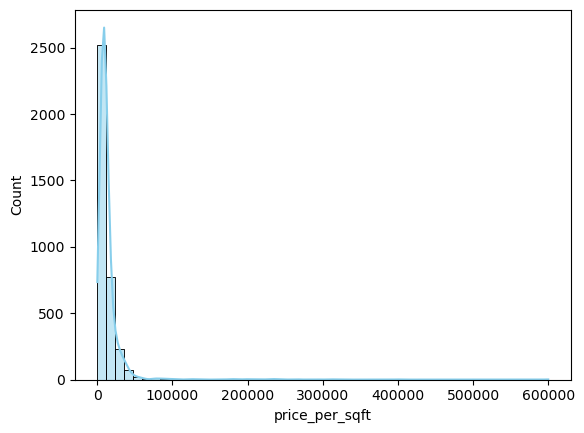

In [272]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: >

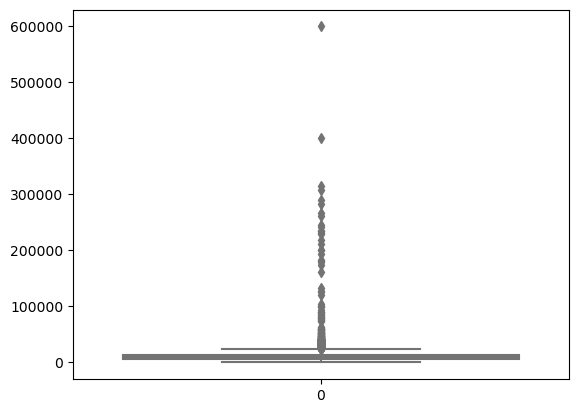

In [273]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The IQR is relatively compace, but there are may data points beyond the 'whiskers' of the box plot, indicating potential outliers

<b> Observations
- Potential outliers
- Right skewed
- 17 missing values

# bedRoom

In [274]:
df['bedRoom'].isnull().sum()

0

<Axes: >

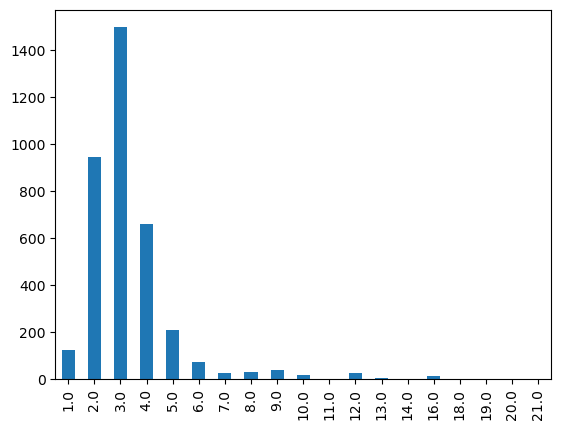

In [275]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

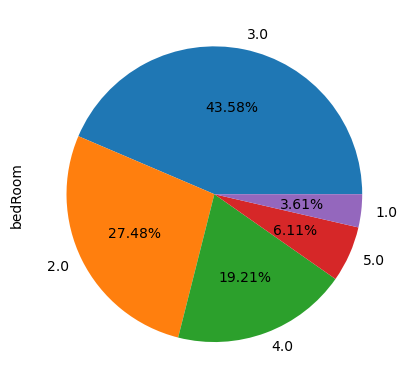

In [276]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

# bathroom

In [277]:
df['bathroom'].isnull().sum()

0

<Axes: >

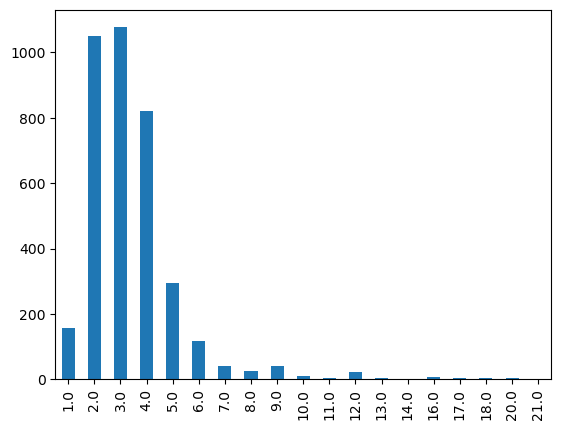

In [278]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

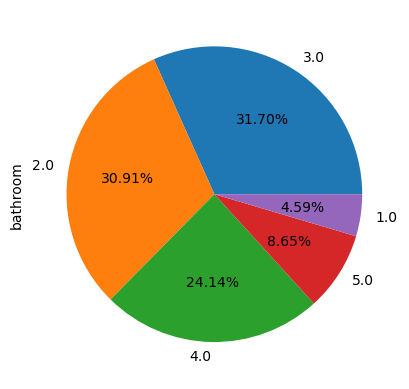

In [279]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

In [280]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,2.20,6934.0,3173.0,Super Built up area 2812(261.24 sq.m.),4.0,5.0,3+,...,2812.0,NaN,NaN,0,0,0,0,0,1,106
1,flat,m3m sierra 68,sector 68,1.08,8674.0,1245.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2.0,2.0,3,...,1245.0,1130.0,930.0,0,0,0,0,0,0,149
2,flat,ashiana anmol,sohna road,0.99,8215.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,...,1205.0,NaN,900.0,0,0,0,0,0,1,49
3,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10.0,10.0,3+,...,NaN,347.0,215.0,0,0,0,0,0,1,0
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4.0,5.0,3+,...,2950.0,2650.0,2450.0,0,1,0,0,0,0,158


# balcony

In [281]:
df['balcony'].isnull().sum()

0

<Axes: >

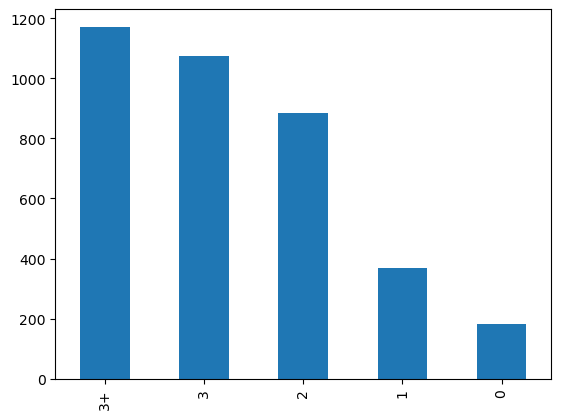

In [282]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

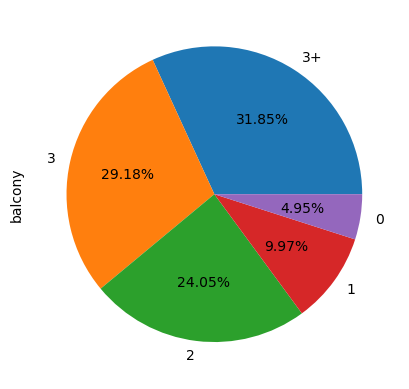

In [283]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

# floorNum

In [284]:
df['floorNum'].isnull().sum()

19

In [285]:
df['floorNum'].describe()

count    3661.000000
mean        6.798416
std         6.010720
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

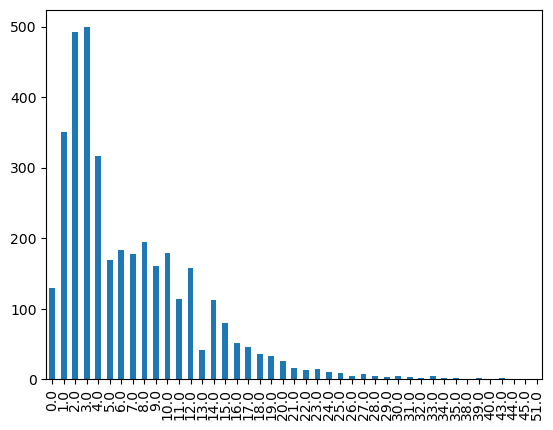

In [286]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

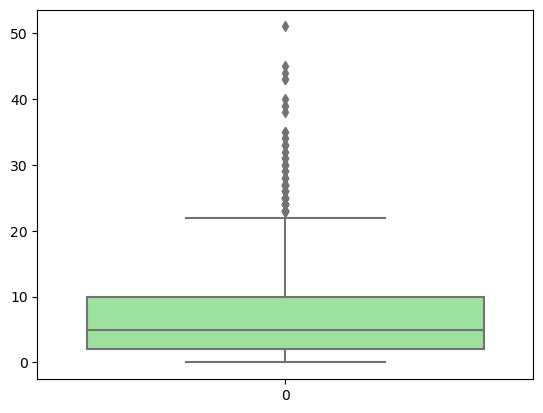

In [287]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. -- The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# facing

In [288]:
df['facing'].isnull().sum()

1048

In [289]:
df['facing'].fillna('NA', inplace=True)

In [290]:
df['facing'].value_counts()

NA            1048
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

# agePossession

In [291]:
df['agePossession'].isnull().sum()

0

In [292]:
df['agePossession'].value_counts()

Relatively New        1647
New Property           594
Moderately Old         563
Undefined              447
Old Property           303
Under Construction     126
Name: agePossession, dtype: int64

# areas

In [293]:
# super built up area
df['super_built_up_area'].isnull().sum()

1805

In [294]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

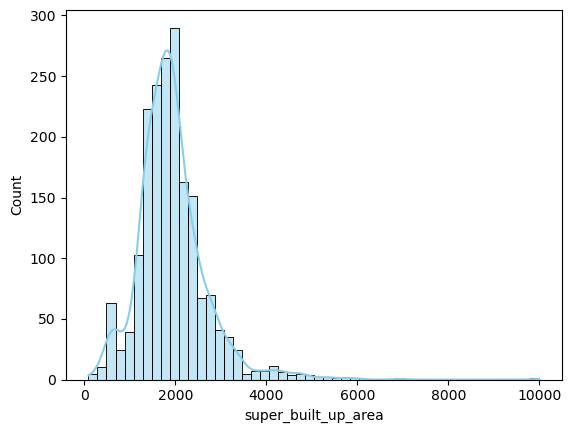

In [295]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: >

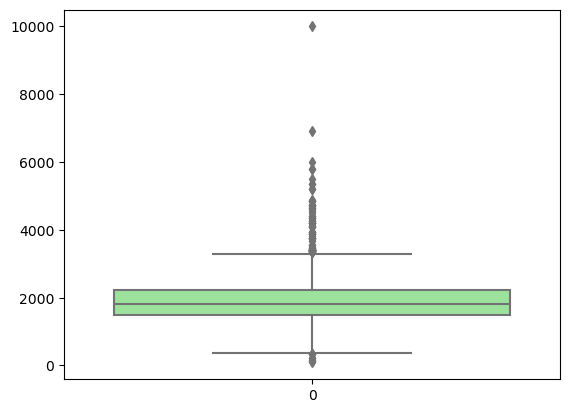

In [296]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [297]:
# built up area
df['built_up_area'].isnull().sum()

1989

In [298]:
df['built_up_area'].describe()

count      1691.000000
mean       2378.719710
std       17937.606265
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

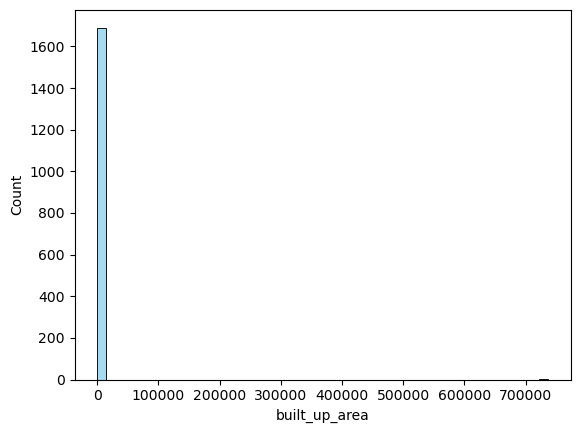

In [299]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area', ylabel='Count'>

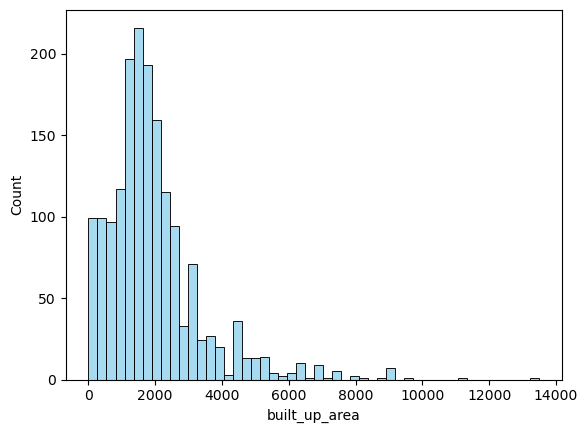

In [300]:
area = df[df['built_up_area'] < 100000]
sns.histplot(area['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

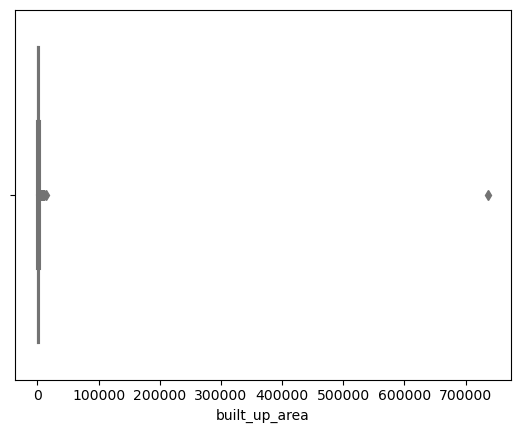

In [301]:
sns.boxplot(x=df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
> The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [302]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [303]:
df['carpet_area'].describe()

count      1875.000000
mean       2526.599487
std       22781.671939
min          15.000000
25%         841.000000
50%        1300.000000
75%        1787.500000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

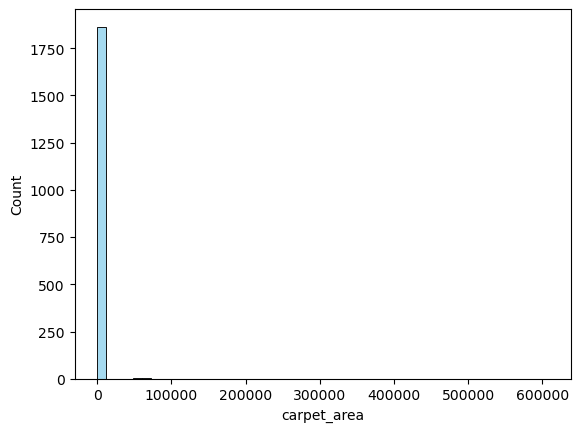

In [304]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

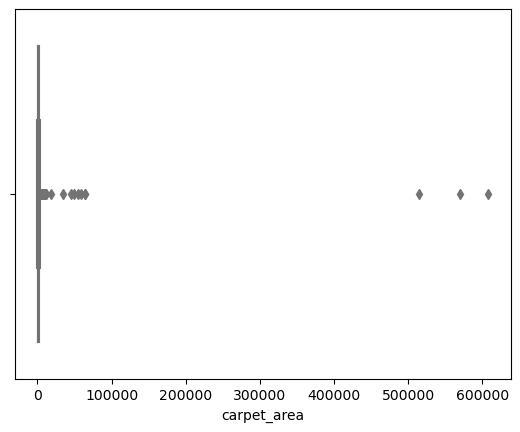

In [305]:
sns.boxplot(x=df['carpet_area'].dropna(), color='lightgreen')

In [ ]:
df.iloc[:, 16:]

# additional room

In [ ]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# furnishing_type

In [ ]:
df['furnishing_type'].value_counts()

In [ ]:
df['furnishing_type'].value_counts().plot(kind='pie', autopct='%0.2f%%')

# luxury score

In [ ]:
df['luxury_score'].isnull().sum()

In [ ]:
df['luxury_score'].describe()

In [ ]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

In [ ]:
sns.boxplot(df['luxury_score'], color='lightgreen')

- The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

- The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.